In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
import cv2
from PIL import  Image
import numpy as np

In [5]:
image_directory = '/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/'

dataset=[]
label=[]

no_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/no')
yes_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/yes')

In [7]:
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'no/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(0)

In [8]:
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'yes/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(1)

In [10]:
print(len(dataset))
print(len(label))
dataset=np.array(dataset)
label=np.array(label)

3000
3000


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize


2021-10-04 07:59:36.719265: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg=VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)


2021-10-04 07:59:45.615247: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-04 07:59:45.709015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:e1:00.0 name: RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2021-10-04 07:59:45.709080: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-04 07:59:45.719754: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-04 07:59:45.719995: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-10-04 07:59:45.726073: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2021

In [15]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


for i in vgg.layers:
  i.trainable=False

  x=Flatten()(vgg.output)

In [18]:
prediction=Dense(1, activation='sigmoid')(x)

In [19]:
from tensorflow.keras.models import Model
model=Model(inputs=vgg.input, outputs=prediction)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
hist=model.fit(x_train, y_train, batch_size=32, 
               verbose=1, epochs=30, 
               validation_data=(x_test,y_test), shuffle=False)

model.save('/data1/hom1/ict06/Models/BraintumorVGG10Epochs.h5')

2021-10-04 08:03:07.584169: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-04 08:03:07.604554: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2800125000 Hz


Epoch 1/30


2021-10-04 08:03:11.296997: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-10-04 08:03:19.833006: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2021-10-04 08:03:31.898237: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-04 08:03:42.135750: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


75/75 [==============================] - 41s 87ms/step - loss: 1.0591 - accuracy: 0.8996 - val_loss: 0.5265 - val_accuracy: 0.9583
Epoch 2/30
75/75 [==============================] - 4s 59ms/step - loss: 0.1049 - accuracy: 0.9833 - val_loss: 0.4320 - val_accuracy: 0.9567
Epoch 3/30
75/75 [==============================] - 4s 54ms/step - loss: 0.1133 - accuracy: 0.9854 - val_loss: 0.2927 - val_accuracy: 0.9700
Epoch 4/30
75/75 [==============================] - 3s 43ms/step - loss: 0.0415 - accuracy: 0.9933 - val_loss: 0.4606 - val_accuracy: 0.9767
Epoch 5/30
75/75 [==============================] - 4s 54ms/step - loss: 0.0241 - accuracy: 0.9954 - val_loss: 0.4049 - val_accuracy: 0.9750
Epoch 6/30
75/75 [==============================] - 4s 58ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.3918 - val_accuracy: 0.9833
Epoch 7/30
75/75 [==============================] - 4s 53ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.3056 - val_accuracy: 0.9850
Epoch 8/30
75/75 [=====

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.059103e+00,0.899583,0.526473,0.958333
1,1.049452e-01,0.983333,0.432031,0.956667
2,1.132836e-01,0.985417,0.292686,0.970000
3,4.151289e-02,0.993333,0.460576,0.976667
4,2.412750e-02,0.995417,0.404944,0.975000
5,2.288665e-03,0.999583,0.391779,0.983333
6,1.485849e-03,0.999583,0.305551,0.985000
7,5.028953e-06,1.000000,0.304838,0.986667
8,3.416947e-06,1.000000,0.304361,0.986667
9,2.769490e-06,1.000000,0.304011,0.986667


Text(0.5, 0, 'Epoch')

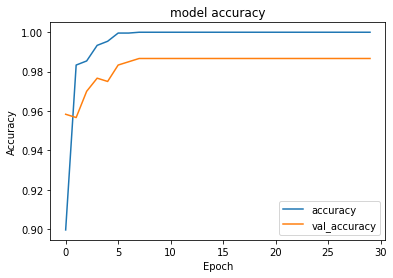

In [25]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

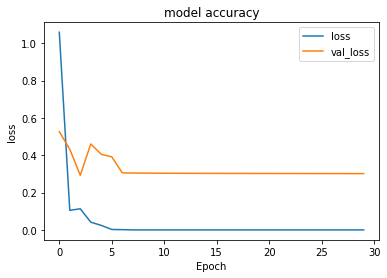

In [26]:
metrics[['loss', 'val_loss']].plot()
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")

In [32]:
_, acc= model.evaluate(x_test,y_test)
print("Accuracy =", (acc * 100.0), "%")

19/19 [==============================] - 1s 33ms/step - loss: 0.3015 - accuracy: 0.9867
Accuracy = 98.66666793823242 %


In [39]:
y_pred = model.predict(x_test)

In [56]:
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred= (model.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[338   5]
 [  3 254]]


<AxesSubplot:>

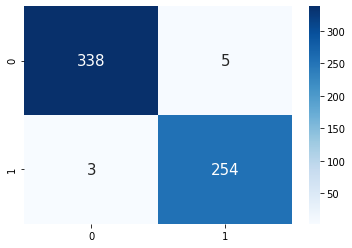

In [63]:
import seaborn as sns
sns.heatmap(cm, annot=True , cmap="Blues" , fmt="d", cbar=True, annot_kws={"size":15})
plt.title("Test Data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

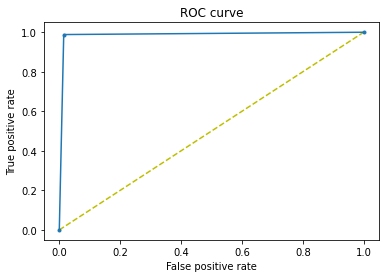

In [58]:
from sklearn.metrics import roc_curve
y_preds = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [60]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9868747943869042


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       343
           1       0.98      0.99      0.98       257

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

